### Scraping MLB stats from ESPN go###

We will try to analyze the batting performances of different teams in Major League Baseball using the data available in the following link http://espn.go.com/mlb/stats/team/_/stat/batting 

We will first scrape the page corresponding to the 2015 season 

In [2]:
url="http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015"

We will now scrape the table found in the above link. You can follow the class notebook to understand how to capture html table tags.

Q1) Write a function which will take the above url and return a pandas dataframe corresponding to the table found in the given link. 

In [3]:
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# the tag tr (table row) is used in many places, 
# among them the table of interest to us.
# we can identify those rows by the fact that 
# the table contains 15 columns.
# show inspect element 

url = 'http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:20]]

[1, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [5]:
def SCRAPE_ESPN_MLB_STATS(url):
    
    page = requests.get(url)
    doc = lh.fromstring(page.content)
    tr_elements = doc.xpath('//tr')
    #Create column of headers
    col=[]
    T=tr_elements[1]
    i=0
    for t in T.iterchildren():
        name=t.text_content()
        col.append((name,[]))
    
    #Append data for each header
    for j in range(2,len(tr_elements)-4):
        T=tr_elements[j]
        if len(T)!=15:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()
            if i>0:
                try:
                    data=float(data)
                except:
                    data=str(data)
            col[i][1].append(data)
            i+=1
            
    #Create dataframe
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    return df

Run the above function to scrape season 2015 stats.

In [6]:
df_2015 = SCRAPE_ESPN_MLB_STATS(url)
df_2015.head()

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,308,17,5509,0.269,162,1480,232,0.340,0.797,891,852,1,0.457,2518,Toronto
1,272,19,5567,0.251,162,1397,212,0.323,0.744,764,737,2,0.421,2343,NY Yankees
2,279,32,5511,0.257,162,1419,172,0.325,0.739,751,707,3,0.413,2278,Texas
3,294,33,5640,0.265,162,1496,161,0.325,0.740,748,706,4,0.415,2339,Boston
4,274,49,5572,0.265,162,1479,186,0.315,0.748,737,702,5,0.432,2409,Colorado


We will now produce plots analyzing performance of different teams on different statistical parameters

Q2) Write a function which will take the above dataframe and a list of column names as input and produces a set of plots corresponding to each of the column names provided

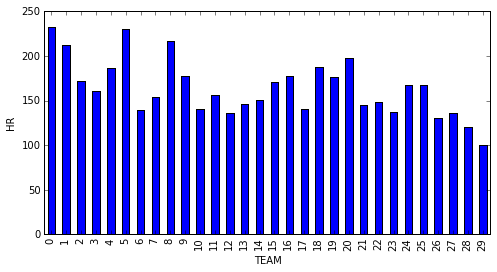

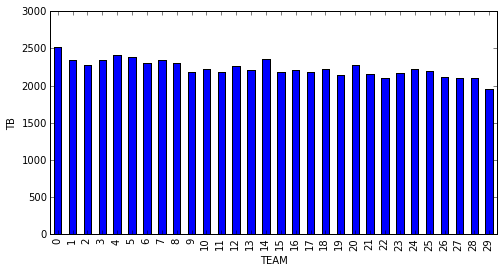

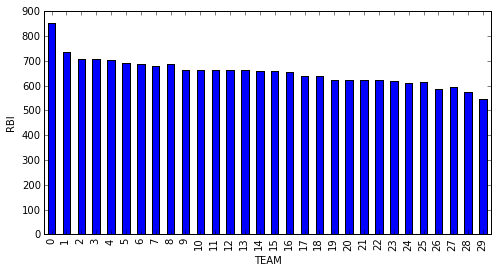

In [7]:
# http://pandas.pydata.org/pandas-docs/stable/visualization.html

def columns_2_Plots(df, column_names):
    for column in column_names:
        fig = plt.figure(figsize = (8,4))
        #ax = fig.add_subplot(1,2,1,polar = True)
        ax = df[column].plot(kind='bar')
        #ax.legend(loc = 'best', bbox_to_anchor=(1.1, .8))
        ax.set_xlabel('TEAM')
        ax.set_ylabel(column)
    
columns_2_Plots(df_2015, ['HR', 'TB', 'RBI'])    

Call the above function for the columns

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

Q3) We will now use the above functions to scrape for more seasons and analyze the performances over a period of 6 years from 2010-2015

In [8]:
dfs={}
for year in xrange(0,6):
    link = 'http://espn.go.com/mlb/stats/team/_/stat/batting/year/201'+str(year)
    dfs[year]=SCRAPE_ESPN_MLB_STATS(link)

Inorder to analyze performance of teams across seasons, we will need all the data in a single dataframe. 

Q4) Use appropriate pandas functions to combine the above dictionary of year:dataframe to produce one dataframe which has a new column corresponding to the year/season 

In [9]:
for i in dfs:
    dfs[i]['Year']=2010+i
dfs[0].head()

for i in dfs:
    if i == 0: 
        combined_df = dfs[i]
    else: 
        combined_df = combined_df.append(dfs[i], ignore_index=False)
combined_df

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM,Year
0,275,32,5567,0.267,162,1485,201,0.350,0.786,859,823,1,0.436,2427,NY Yankees,2010
1,358,22,5646,0.268,162,1511,211,0.339,0.790,818,782,2,0.451,2546,Boston,2010
2,295,37,5439,0.247,162,1343,160,0.333,0.736,802,769,3,0.403,2192,Tampa Bay,2010
3,293,30,5579,0.272,162,1515,188,0.338,0.774,790,761,4,0.436,2432,Cincinnati,2010
4,268,25,5635,0.276,162,1556,162,0.338,0.757,787,740,5,0.419,2360,Texas,2010
5,318,41,5568,0.273,162,1521,142,0.341,0.762,781,749,6,0.422,2347,Minnesota,2010
6,290,34,5581,0.260,162,1451,166,0.332,0.745,772,736,7,0.413,2307,Philadelphia,2010
7,270,54,5530,0.263,162,1452,173,0.336,0.760,770,741,8,0.425,2349,Colorado,2010
8,319,21,5495,0.248,162,1364,257,0.312,0.766,755,732,9,0.454,2496,Toronto,2010
9,263,21,5484,0.268,162,1467,177,0.332,0.752,752,710,10,0.420,2303,Chicago Sox,2010


Q5) Now write a function which will take the above dataframe and a list of column names and produces a set of plots corresponding to each of the columns provided. Each plot is a set of subplots, where every subplot is a line graph of the column values over the 6 years for each of the teams in the dataframe.

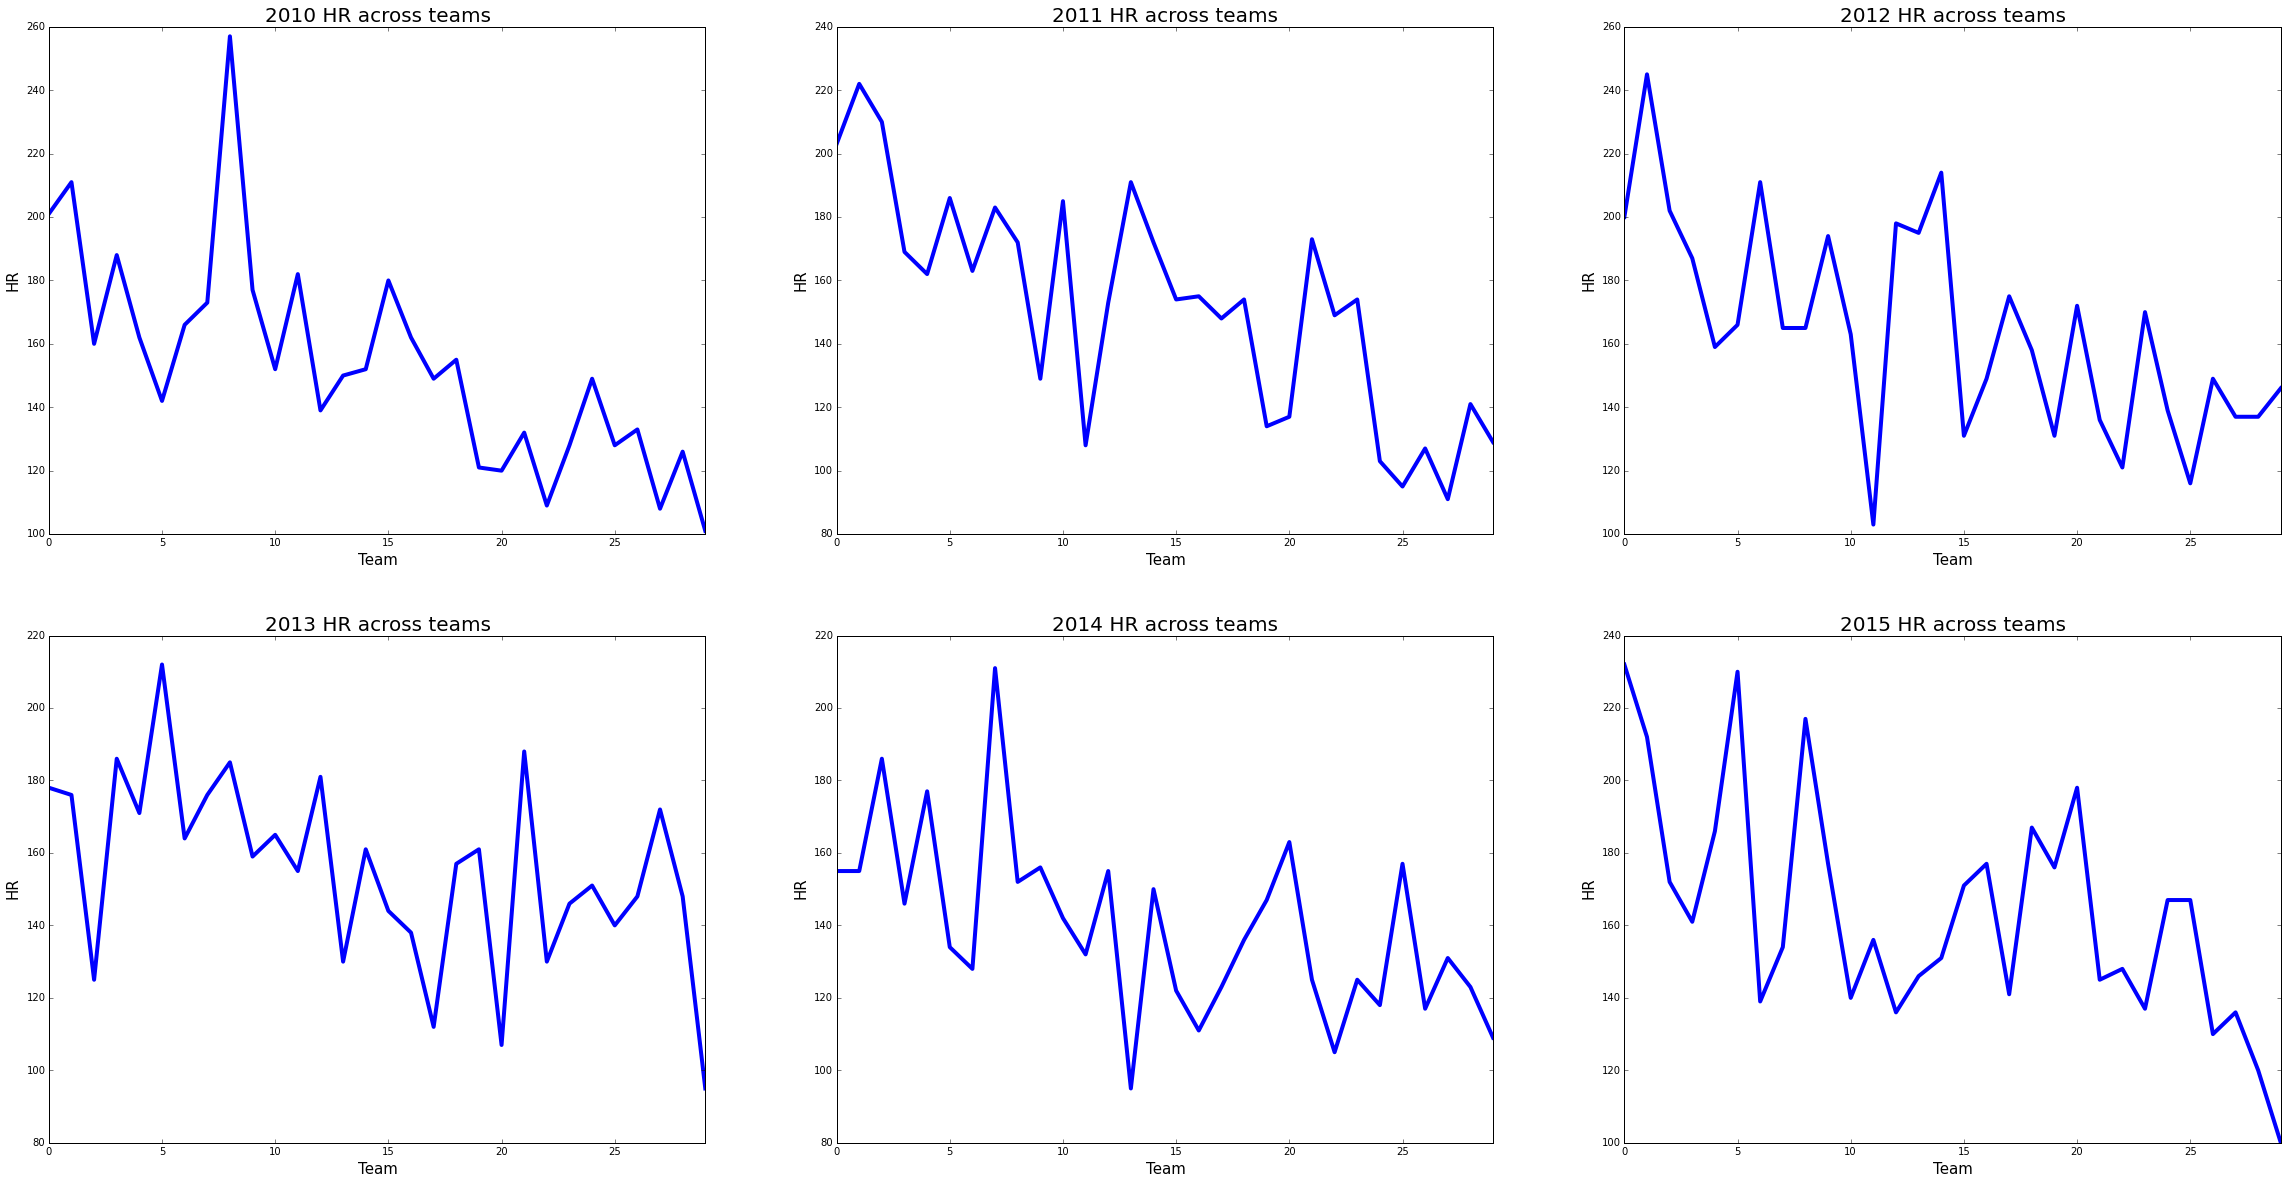

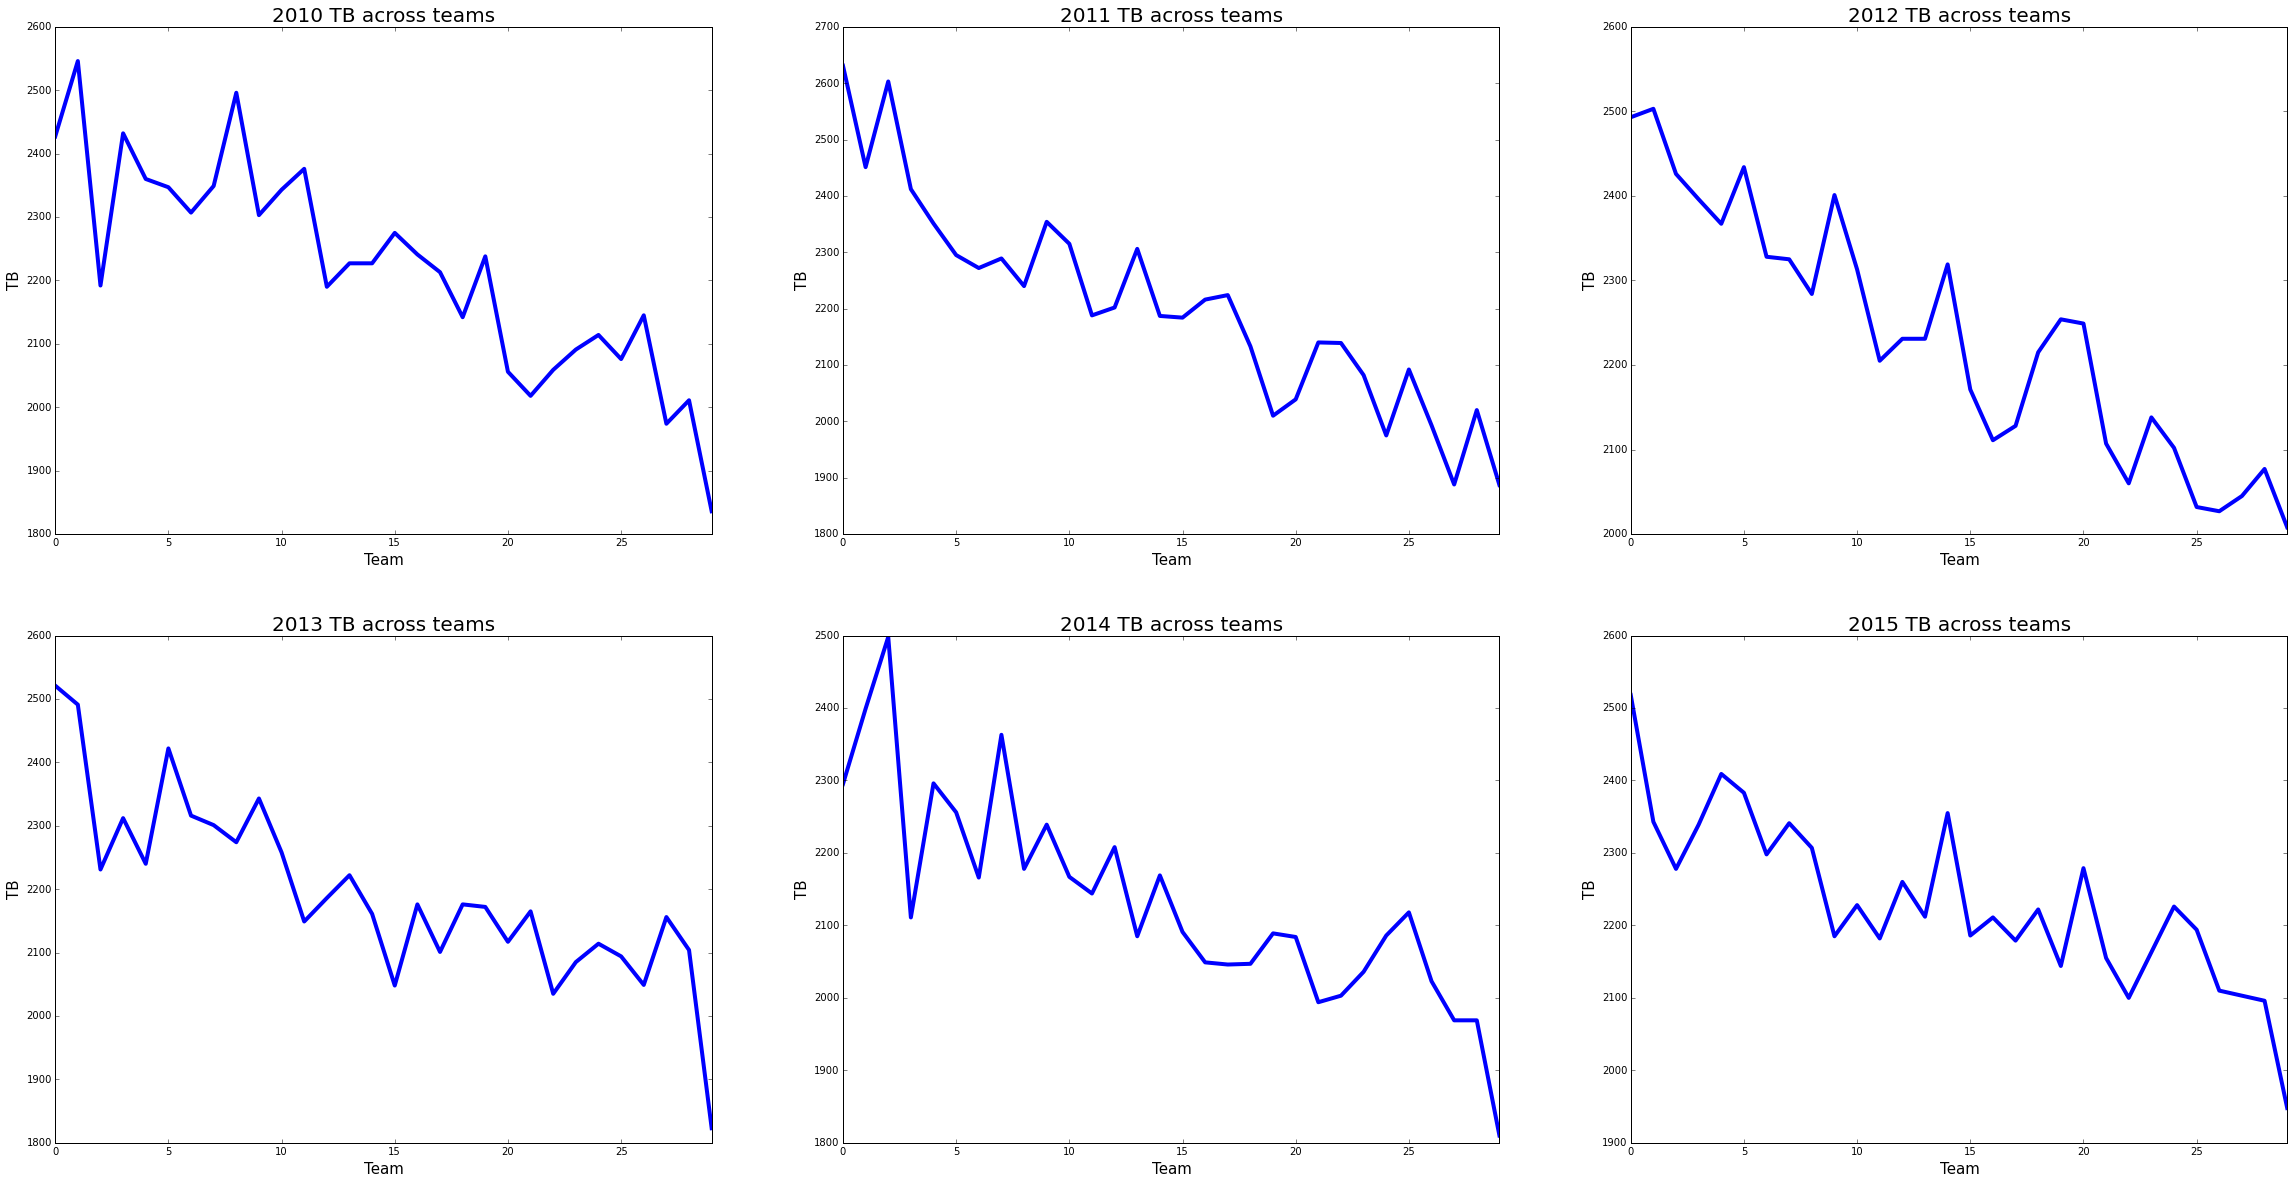

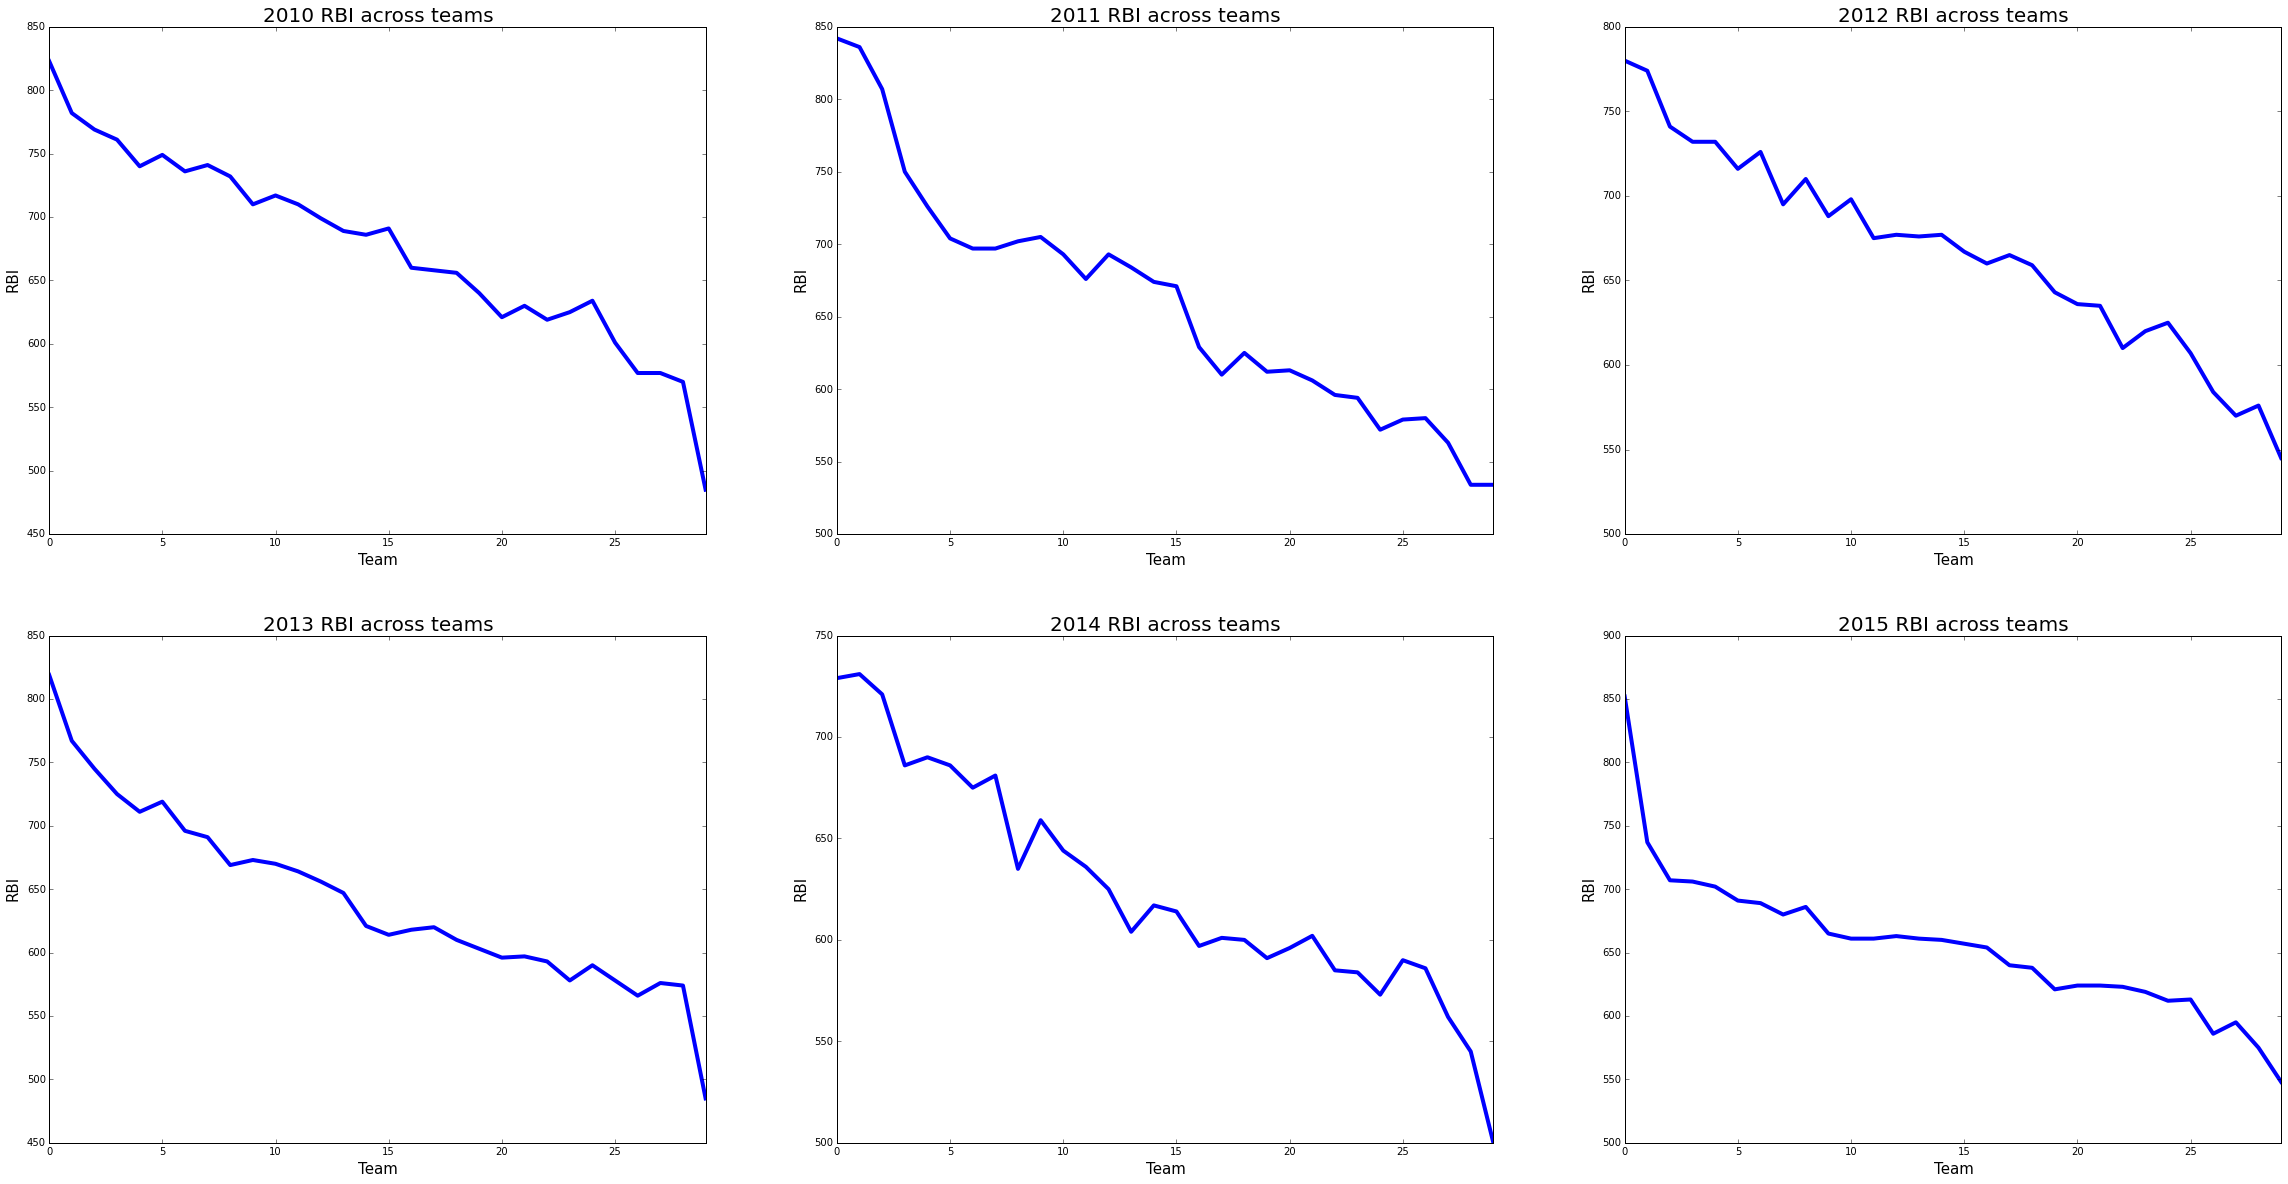

In [10]:
def produce_plots_over_seasons(combined_df, column_names):
    for column in column_names:
        fig = plt.figure(figsize = (40,20))
        ax = plt.gca()
        ax.tick_params(width=6)
        ax.minorticks_on()
        ax.tick_params('both', length=20, width=6, which='major')
        ax.tick_params('both', length=10, width=3, which='minor')
        for i in xrange(0,6):
            plt.subplot(231+i)
            combined_df[combined_df['Year']==2010+i][column].plot(linewidth=4)
            plt.title(str(2010+i) + ' ' + column + ' across teams', fontsize = 20)
            plt.xlabel('Team', fontsize = 15)
            plt.ylabel(column, fontsize = 15)
            
        
        #ax = fig.add_subplot(1,2,1,polar = True)
        #ax = combined_df[column].plot(kind='bar')
        #ax.legend(loc = 'best', bbox_to_anchor=(1.1, .8))
        #ax.set_xlabel("Teams")
        #ax.set_ylabel(column)
    
produce_plots_over_seasons(combined_df, ['HR', 'TB', 'RBI']) 

Call the above function for the columns (SHOWN ABOVE)

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In